<a href="https://colab.research.google.com/github/rendrasatriar/Density-SILO/blob/Bintangor/Bintangor_SAP_HSAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
!pip install --quiet google-cloud-bigquery pandas pyarrow

In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
from google.cloud import bigquery
import pandas as pd

PROJECT_ID = "study-density-silo"
DATASET_ID = "study_density"
TABLE_ID = "raw_data_bintangor"

client = bigquery.Client(project=PROJECT_ID)

def fetch_single_block(project: str, dataset: str, table_id: str, max_rows: int = None) -> pd.DataFrame:
    table_full = f"{project}.{dataset}.{table_id}"
    query = f"SELECT * FROM `{table_full}`"
    job = client.query(query)
    if max_rows:
        return job.result(max_results=max_rows).to_dataframe()
    return job.to_dataframe()

In [4]:
# --- Ambil data satu blok ---
df_block = fetch_single_block(PROJECT_ID, DATASET_ID, TABLE_ID)
print(f"Loaded table: {PROJECT_ID}.{DATASET_ID}.{TABLE_ID}")
print("Rows:", len(df_block))
print("Columns:", len(df_block.columns))
print("Shape:", df_block.shape)
print("-" * 60)

# --- Informasi kolom dan tipe data ---
print("\nColumn info:")
print(df_block.dtypes)
print("\nMemory usage (MB):")
print(df_block.memory_usage(deep=True).sum() / 1024**2)

# --- Statistik numerik singkat ---
print("\nDescriptive statistics (numeric columns):")
display(df_block.describe().transpose())

# --- Distribusi kategori penting ---
if 'GEN_LYR' in df_block.columns:
    print("\nUnique GEN_LYR count:", df_block['GEN_LYR'].nunique())
    print("Top GEN_LYR value counts:")
    display(df_block['GEN_LYR'].value_counts().head(20))

if 'Material' in df_block.columns:
    print("\nUnique Material count:", df_block['Material'].nunique())
    print("Top Material value counts:")
    display(df_block['Material'].value_counts().head(20))

# --- Quick QAQC checks ---
print("\nQAQC checks:")
if {'Interval','From','To'}.issubset(df_block.columns):
    n_bad_interval = len(df_block[(df_block['Interval'] <= 0) | (df_block['To'] <= df_block['From'])])
    print("Rows with Interval <= 0 or To <= From:", n_bad_interval)
else:
    print("Columns Interval/From/To not all present for QAQC checks.")

Loaded table: study-density-silo.study_density.raw_data_bintangor
Rows: 11548
Columns: 16
Shape: (11548, 16)
------------------------------------------------------------

Column info:
HoleId         object
Hill           object
Hill_Group     object
From          float64
To            float64
Interval      float64
CoreRec       float64
WetW          float64
H2O           float64
DryW          float64
Material       object
Layer          object
NEW_LYR        object
GEN_LYR        object
WTF           float64
DTF           float64
dtype: object

Memory usage (MB):
4.864101409912109

Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
From,11548.0,5.680615,3.949815,0.000000,2.600000,5.075000,8.000000,23.000000
To,11548.0,6.448785,3.934414,0.200000,3.000000,6.000000,9.000000,23.900000
Interval,11548.0,0.768170,0.290259,0.050000,0.500000,1.000000,1.000000,3.000000
CoreRec,11548.0,1.081167,0.188022,0.200000,1.000000,1.000000,1.090000,3.500000
WetW,11548.0,4.179988,1.862441,0.400000,2.640000,4.259500,5.515000,13.340000
H2O,11548.0,25.032835,14.841084,0.079000,12.402250,25.364500,36.083250,90.147000
DryW,11548.0,3.181767,1.628951,0.156000,1.835000,3.057500,4.336000,11.840000
WTF,11548.0,1.756388,0.571895,0.195304,1.489770,1.723069,1.953043,23.925631
DTF,11548.0,1.335409,0.587918,0.123134,0.992927,1.266640,1.612504,22.471965



Unique GEN_LYR count: 5
Top GEN_LYR value counts:


,count
GEN_LYR,
LIM,5803
BRK,2925
SAP,2291
SAPX,312
LIMX,217



Unique Material count: 50
Top Material value counts:


,count
Material,
YLIM,2423
Rlim,1583
ESAP,1572
HGT,933
HSAP,882
RSAP,831
Sap,700
RLIM,380
DNT,365



QAQC checks:
Rows with Interval <= 0 or To <= From: 0


# Filter By GEN_LYR dan Material

In [39]:

gen_lyr_input = input("Masukkan GEN_LYR yang ingin difilter: ").strip()
material_input = input("Masukkan Material yang ingin difilter: ").strip()

df_filtered = df_block.copy()

if 'GEN_LYR' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['GEN_LYR'].str.upper() == gen_lyr_input.upper()]

if 'Material' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Material'].str.upper() == material_input.upper()]


print(f"\nFiltered rows: {len(df_filtered)}")
display(df_filtered.head(133))

Masukkan GEN_LYR yang ingin difilter: SAP
Masukkan Material yang ingin difilter: HSAP

Filtered rows: 249


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
1726,CD500081,BINTANGOR BARAT UTARA,BINTANGOR,1.14,2.00,0.86,1.0,3.810,10.814,3.398,HSAP,None,RSAP,SAP,1.515312,1.351452
2728,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,2.20,3.00,0.80,1.0,5.453,7.390,5.050,HSAP,None,RSAP,SAP,2.331424,2.159121
2784,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,2.40,2.60,0.20,1.0,0.818,11.002,0.728,HSAP,None,RSAP,SAP,1.398940,1.245022
2851,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.50,3.00,0.50,1.0,2.695,6.122,2.530,HSAP,None,RSAP,SAP,1.843590,1.730718
2897,CD500160,BINTANGOR BARAT SELATAN,BINTANGOR,2.60,3.00,0.40,1.0,1.886,7.317,1.748,HSAP,None,RSAP,SAP,1.612714,1.494711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8070,CS7210079,Bintangor Blok 2 Spasi 50,BINTANGOR,7.45,8.25,0.80,1.0,3.760,8.085,3.456,HSAP,None,RSAP,SAP,1.607583,1.477609
8115,CS6210058,Bintangor Blok 2 Spasi 25,BINTANGOR,7.50,8.00,0.50,0.9,2.240,20.670,1.777,HSAP,None,RSAP,SAP,1.702594,1.350674
8116,CS6210001,Bintangor Blok 2 Spasi 25,BINTANGOR,7.50,8.50,1.00,1.0,5.561,13.433,4.814,HSAP,None,RSAP,SAP,1.902079,1.646576
8120,CS6210142,Bintangor Blok 2 Spasi 25,BINTANGOR,7.50,8.00,0.50,1.0,2.596,6.163,2.436,HSAP,None,RSAP,SAP,1.775867,1.666414


# Filter By Interval

Descriptive statistics for Interval:
Count: 249
Mean: 0.580337
Standard Error: 0.018009
Median: 0.5
Mode: 1.0
Standard Deviation: 0.284170
Sample Variance: 0.080753
Kurtosis: -0.692136
Skewness: 0.487319
Range: 1.3499999999999999
Minimum: 0.1
Maximum: 1.45
Sum: 144.50400000000002
Confidence Level (95%): ±0.035469

Bin calculation:
Freedman–Diaconis -> bins: 10, bin width: 0.143057
Sturges -> bins: 9, bin width: 0.150000


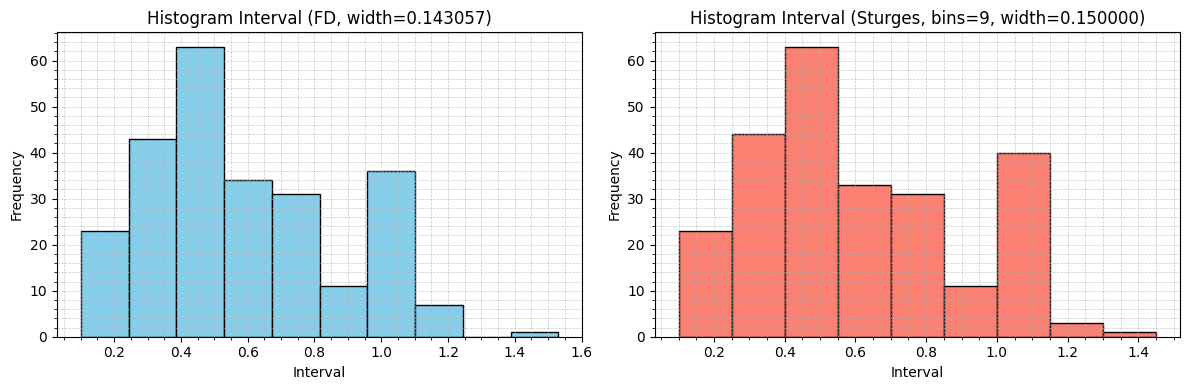


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.100000,0.243057,23
1,0.243057,0.386114,43
2,0.386114,0.529171,63
3,0.529171,0.672228,34
4,0.672228,0.815285,31
5,0.815285,0.958343,11
6,0.958343,1.101400,36
7,1.101400,1.244457,7
8,1.244457,1.387514,0
9,1.387514,1.530571,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.10,0.25,23
1,0.25,0.40,44
2,0.40,0.55,63
3,0.55,0.70,33
4,0.70,0.85,31
5,0.85,1.00,11
6,1.00,1.15,40
7,1.15,1.30,3
8,1.30,1.45,1


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return int(np.sqrt(n)), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series):
    data = series.dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = stats.sem(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0] if n > 0 else None
    var = np.var(data, ddof=1)
    kurt = stats.kurtosis(data)
    skew = stats.skew(data)
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else None

    print("Descriptive statistics for Interval:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}")
    print(f"Sample Variance: {var:.6f}")
    print(f"Kurtosis: {kurt:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}")

def plot_interval_histograms(df_filtered):
    if 'Interval' not in df_filtered.columns:
        print("Kolom 'Interval' tidak ada di dataframe.")
        return

    data = df_filtered['Interval'].dropna()

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data)

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins: {bins_fd}, bin width: {width_fd_str}")
    print(f"Sturges -> bins: {bins_st}, bin width: {width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram Interval (FD, width={width_fd_str})")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram Interval (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
interval_data = plot_interval_histograms(df_filtered) # Corrected function call

In [41]:
# Pastikan df_filtered sudah ada
# Contoh: df_filtered = filter_data(df_block, "LIM", "RLIM")

# Minta input dari user
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter data sesuai input
df_interval = df_filtered[(df_filtered['Interval'] >= lower_bound) &
                       (df_filtered['Interval'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_interval)}")
display(df_interval.head(50))

Masukkan batas bawah (is greater than or equal to): 0.100000
Masukkan batas atas (is less than or equal to): 0.815285

Filtered rows: 194


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
2728,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,2.20,3.00,0.80,1.00,5.453,7.390,5.050,HSAP,None,RSAP,SAP,2.331424,2.159121
2784,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,2.40,2.60,0.20,1.00,0.818,11.002,0.728,HSAP,None,RSAP,SAP,1.398940,1.245022
2851,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.50,3.00,0.50,1.00,2.695,6.122,2.530,HSAP,None,RSAP,SAP,1.843590,1.730718
2897,CD500160,BINTANGOR BARAT SELATAN,BINTANGOR,2.60,3.00,0.40,1.00,1.886,7.317,1.748,HSAP,None,RSAP,SAP,1.612714,1.494711
2912,CS7210310,Bintangor Blok 1 Spasi 50,BINTANGOR,2.65,3.00,0.35,1.14,1.790,12.514,1.566,HSAP,None,RSAP,SAP,1.534461,1.342439
2927,CD500088,BINTANGOR BARAT UTARA,BINTANGOR,2.70,3.00,0.30,1.00,1.245,13.655,1.075,HSAP,None,RSAP,SAP,1.419462,1.225640
3688,CS7210111,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.20,0.20,1.00,1.280,11.875,1.128,HSAP,None,SAP,SAP,2.189050,1.929100
3691,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,3.00,3.25,0.25,1.00,1.560,36.218,0.995,HSAP,None,SAP,SAP,2.134324,1.361315
3700,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.25,0.25,1.00,1.077,16.063,0.904,HSAP,None,SAP,SAP,1.473504,1.236813
3812,CS6210020,Bintangor Blok 2 Spasi 25,BINTANGOR,3.40,4.00,0.60,1.10,2.214,13.008,1.926,HSAP,None,RSAP,SAP,1.147386,0.998132


# Filter By Recovery


Descriptive statistics for CoreRec:
Count: 194
Mean: 1.005876
Standard Error: 0.006286
Median: 1.0
Mode: 1.0
Standard Deviation: 0.087555
Sample Variance: 0.007666
Kurtosis: 16.279227
Skewness: 2.544207
Range: 0.8500000000000001
Minimum: 0.7
Maximum: 1.55
Sum: 195.14
Confidence Level (95%): ±0.012398

Bin calculation:
Freedman–Diaconis -> bins=13, width=N/A
Sturges -> bins=9, width=0.094444


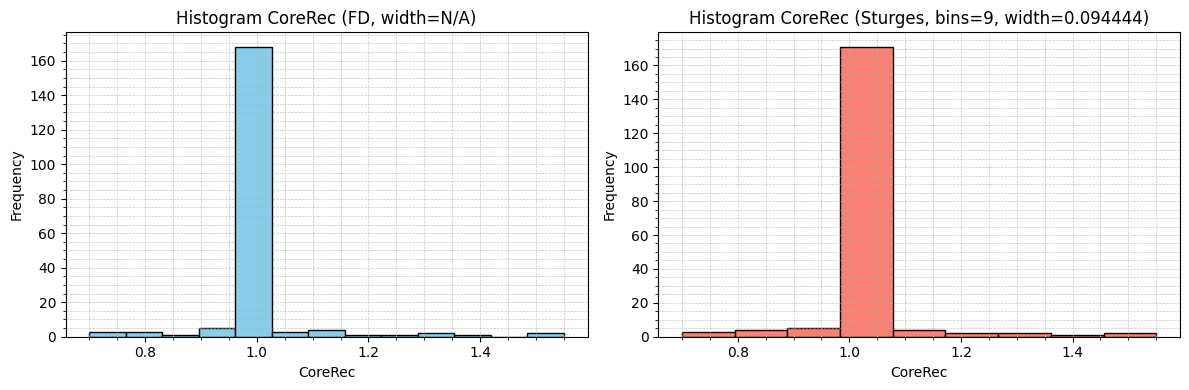


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.700000,0.765385,3
1,0.765385,0.830769,3
2,0.830769,0.896154,1
3,0.896154,0.961538,5
4,0.961538,1.026923,168
5,1.026923,1.092308,3
6,1.092308,1.157692,4
7,1.157692,1.223077,1
8,1.223077,1.288462,1
9,1.288462,1.353846,2



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.700000,0.794444,3
1,0.794444,0.888889,4
2,0.888889,0.983333,5
3,0.983333,1.077778,171
4,1.077778,1.172222,4
5,1.172222,1.266667,2
6,1.266667,1.361111,2
7,1.361111,1.455556,1
8,1.455556,1.550000,2


In [42]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="CoreRec"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_coreRec(df_interval):
    if 'CoreRec' not in df_interval.columns:
        print("Kolom 'CoreRec' tidak ada di dataframe.")
        return

    data = df_interval['CoreRec'].dropna()
    if data.empty:
        print("Tidak ada data 'CoreRec' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="CoreRec")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram CoreRec (FD, width={width_fd_str})")
    axes[0].set_xlabel("CoreRec")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram CoreRec (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("CoreRec")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
coreRec_data = analyze_coreRec(df_interval)

In [43]:
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))


df_recovery = df_interval[(df_interval['CoreRec'] >= lower_bound) &
                       (df_interval['CoreRec'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_recovery)}")
display(df_recovery.head(47))

Masukkan batas bawah (is greater than or equal to): 0.983333
Masukkan batas atas (is less than or equal to): 1.077778

Filtered rows: 171


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
2728,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,2.20,3.00,0.80,1.00,5.453,7.390,5.050,HSAP,None,RSAP,SAP,2.331424,2.159121
2784,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,2.40,2.60,0.20,1.00,0.818,11.002,0.728,HSAP,None,RSAP,SAP,1.398940,1.245022
2851,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.50,3.00,0.50,1.00,2.695,6.122,2.530,HSAP,None,RSAP,SAP,1.843590,1.730718
2897,CD500160,BINTANGOR BARAT SELATAN,BINTANGOR,2.60,3.00,0.40,1.00,1.886,7.317,1.748,HSAP,None,RSAP,SAP,1.612714,1.494711
2927,CD500088,BINTANGOR BARAT UTARA,BINTANGOR,2.70,3.00,0.30,1.00,1.245,13.655,1.075,HSAP,None,RSAP,SAP,1.419462,1.225640
3688,CS7210111,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.20,0.20,1.00,1.280,11.875,1.128,HSAP,None,SAP,SAP,2.189050,1.929100
3691,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,3.00,3.25,0.25,1.00,1.560,36.218,0.995,HSAP,None,SAP,SAP,2.134324,1.361315
3700,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.25,0.25,1.00,1.077,16.063,0.904,HSAP,None,SAP,SAP,1.473504,1.236813
3829,CS7210111,Bintangor Blok 2 Spasi 50,BINTANGOR,3.45,4.00,0.55,1.00,2.786,17.014,2.312,HSAP,None,RSAP,SAP,1.732583,1.437808
3874,CS7210127,Bintangor Blok 2 Spasi 50,BINTANGOR,3.50,3.70,0.20,1.00,0.686,23.032,0.528,HSAP,None,RSAP,SAP,1.173194,0.902983


# Filter By Wet Weight

Tidak ada data dengan Interval=1.0 dan CoreRec=1.0.
Menggunakan seluruh data sebagai acuan residual.

Residual IQR acuan:
Q1: -0.368, Q3: 0.172, IQR: 0.541
Lower margin: -1.179, Upper margin: 0.983


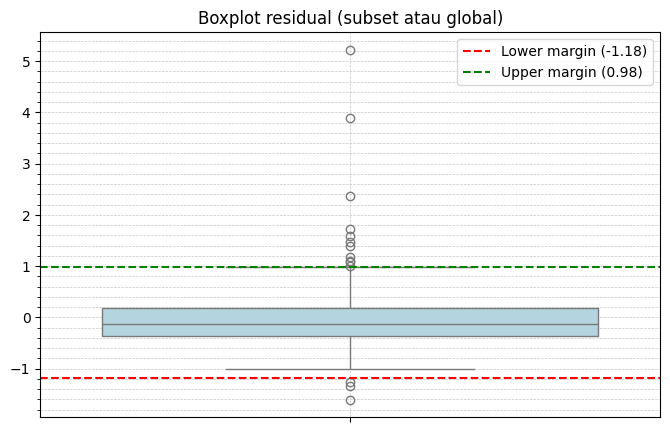

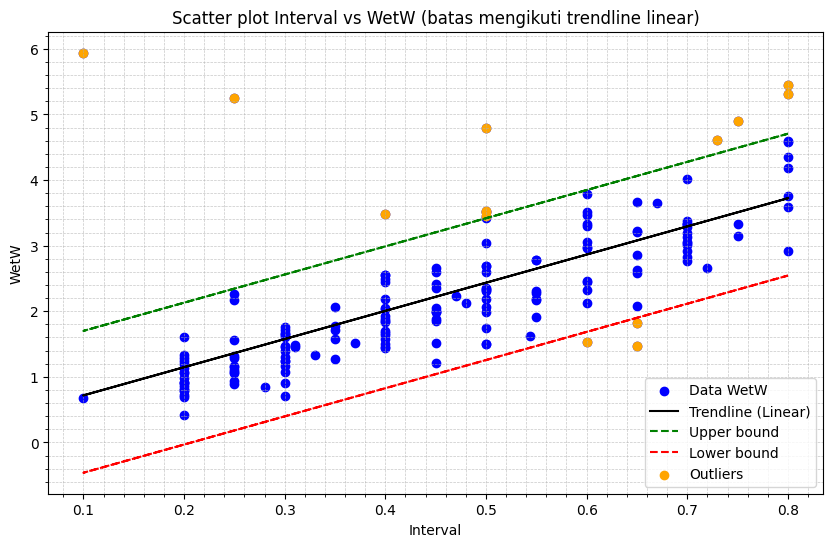


Outlier WetW berdasarkan trendline linear + IQR residual acuan:
         HoleId                       Hill Hill_Group  From   To  Interval  \
2728   CD500080      BINTANGOR BARAT UTARA  BINTANGOR  2.20  3.0      0.80   
5026  CS7210342  Bintangor Blok 1 Spasi 50  BINTANGOR  4.70  5.2      0.50   
5843  CS7210130  Bintangor Blok 2 Spasi 50  BINTANGOR  5.25  6.0      0.75   
5868  CS7210052  Bintangor Blok 2 Spasi 50  BINTANGOR  5.30  5.4      0.10   
6006  CS6210065  Bintangor Blok 2 Spasi 25  BINTANGOR  5.50  6.0      0.50   

      CoreRec   WetW     H2O   DryW Material Layer NEW_LYR GEN_LYR        WTF  \
2728     1.00  5.453   7.390  5.050     HSAP  None    RSAP     SAP   2.331424   
5026     1.00  3.514  12.863  3.062     HSAP  None    RSAP     SAP   2.403850   
5843     1.05  4.894  13.731  4.222     HSAP  None    RSAP     SAP   2.125637   
5868     1.00  5.941   7.591  5.490     HSAP  None    RSAP     SAP  20.320539   
6006     1.00  3.530  12.436  3.091     HSAP  None    RSAP   

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['WetW'], color='blue', label='Data WetW')
    plt.plot(df_recovery['Interval'], y_pred, color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], y_pred + upper_margin, color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], y_pred + lower_margin, color='red', linestyle='--', label='Lower bound')

    # Outlier = data di luar batas trendline ± margin
    outliers = df_recovery[(df_recovery['WetW'] > y_pred + upper_margin) |
                           (df_recovery['WetW'] < y_pred + lower_margin)]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("WetW")
    plt.legend()
    plt.show()

    return {
        "outliers": outliers,
        "margins": {"lower": lower_margin, "upper": upper_margin},
        "trendline_coef": {"slope": model.coef_[0], "intercept": model.intercept_}
    }

# --- Contoh pemanggilan ---
result = detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
if result:
    print("\nOutlier WetW berdasarkan trendline linear + IQR residual acuan:")
    print(result["outliers"].head())

## Normalisasi Weight terhadap recovery

In [45]:
import numpy as np
from IPython.display import display

def normalize_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns or 'CoreRec' not in df_recovery.columns:
        print("Kolom 'WetW' atau 'CoreRec' tidak ada di dataframe.")
        return df_recovery

    # Buat kolom baru Normalized_WetW
    df_recovery['Normalized_WetW'] = np.where(
        df_recovery['CoreRec'] > 1.0,
        df_recovery['WetW'] / 1,          # jika CoreRec > 1.0
        df_recovery['WetW'] / df_recovery['CoreRec']  # jika CoreRec <= 1.0
    )

    print("\nNormalisasi WetW terhadap Recovery selesai.")
    # tampilkan seluruh dataframe dengan kolom tambahan
    display(df_recovery)

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = normalize_wetw(df_recovery)


Normalisasi WetW terhadap Recovery selesai.


/tmp/ipython-input-7809237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Normalized_WetW'] = np.where(


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
2728,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,2.20,3.00,0.80,1.0,5.453,7.390,5.050,HSAP,None,RSAP,SAP,2.331424,2.159121,5.453
2784,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,2.40,2.60,0.20,1.0,0.818,11.002,0.728,HSAP,None,RSAP,SAP,1.398940,1.245022,0.818
2851,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.50,3.00,0.50,1.0,2.695,6.122,2.530,HSAP,None,RSAP,SAP,1.843590,1.730718,2.695
2897,CD500160,BINTANGOR BARAT SELATAN,BINTANGOR,2.60,3.00,0.40,1.0,1.886,7.317,1.748,HSAP,None,RSAP,SAP,1.612714,1.494711,1.886
2927,CD500088,BINTANGOR BARAT UTARA,BINTANGOR,2.70,3.00,0.30,1.0,1.245,13.655,1.075,HSAP,None,RSAP,SAP,1.419462,1.225640,1.245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11416,CS7210075,Bintangor Blok 2 Spasi 50,BINTANGOR,16.60,17.00,0.40,1.0,2.054,20.448,1.634,HSAP,None,SAP,SAP,1.756370,1.397229,2.054
11489,CS6210166,Bintangor Blok 2 Spasi 25,BINTANGOR,18.60,19.00,0.40,1.0,2.445,17.301,2.022,HSAP,None,RSAP,SAP,2.090714,1.729007,2.445
11491,CS7210095,Bintangor Blok 2 Spasi 50,BINTANGOR,18.75,19.45,0.70,1.0,4.015,7.796,3.702,HSAP,None,RSAP,SAP,1.961838,1.808898,4.015
11508,CS6210121,Bintangor Blok 2 Spasi 25,BINTANGOR,19.20,19.75,0.55,1.0,1.910,24.346,1.445,HSAP,None,SAP,SAP,1.187808,0.898630,1.910


Tidak ada data dengan Interval=1.0 dan CoreRec=1.0.
Menggunakan seluruh data sebagai acuan residual.

Residual IQR acuan:
Q1: -0.368, Q3: 0.172, IQR: 0.541
Lower margin: -1.179, Upper margin: 0.983


/tmp/ipython-input-1577443899.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
/tmp/ipython-input-1577443899.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Outlier_Status'] = [


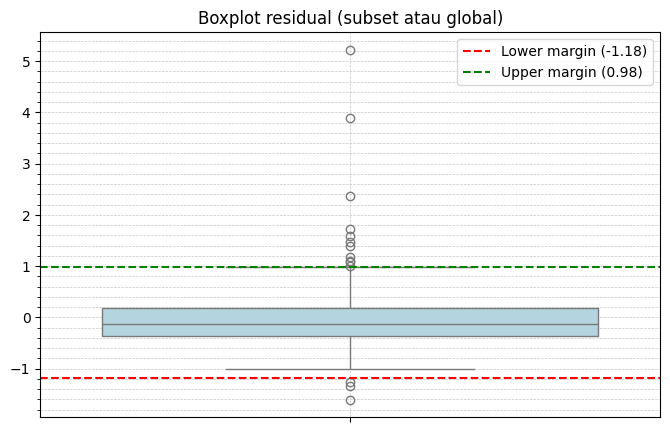

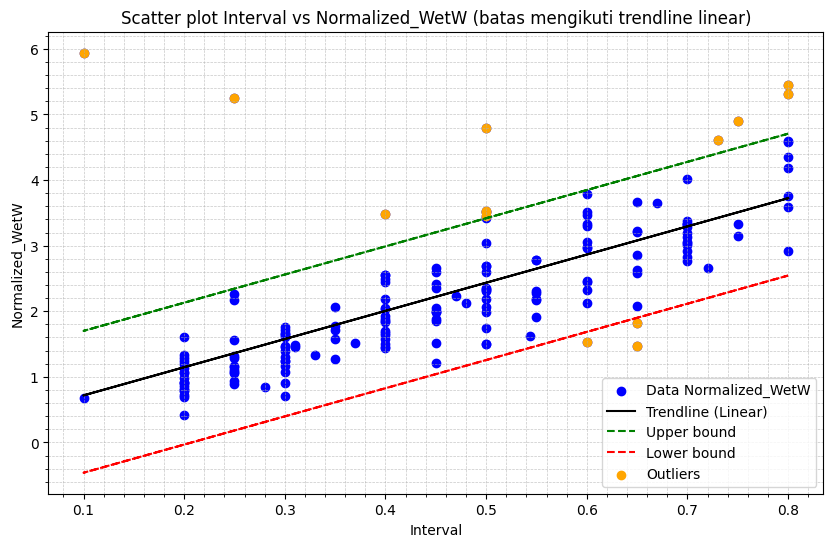

,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred,Outlier_Status
2728,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,2.20,3.00,0.80,1.0,5.453,7.390,5.050,HSAP,None,RSAP,SAP,2.331424,2.159121,5.453,3.722996,Outlier atas
2784,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,2.40,2.60,0.20,1.0,0.818,11.002,0.728,HSAP,None,RSAP,SAP,1.398940,1.245022,0.818,1.146763,Normal
2851,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.50,3.00,0.50,1.0,2.695,6.122,2.530,HSAP,None,RSAP,SAP,1.843590,1.730718,2.695,2.434879,Normal
2897,CD500160,BINTANGOR BARAT SELATAN,BINTANGOR,2.60,3.00,0.40,1.0,1.886,7.317,1.748,HSAP,None,RSAP,SAP,1.612714,1.494711,1.886,2.005507,Normal
2927,CD500088,BINTANGOR BARAT UTARA,BINTANGOR,2.70,3.00,0.30,1.0,1.245,13.655,1.075,HSAP,None,RSAP,SAP,1.419462,1.225640,1.245,1.576135,Normal
3688,CS7210111,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.20,0.20,1.0,1.280,11.875,1.128,HSAP,None,SAP,SAP,2.189050,1.929100,1.280,1.146763,Normal
3691,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,3.00,3.25,0.25,1.0,1.560,36.218,0.995,HSAP,None,SAP,SAP,2.134324,1.361315,1.560,1.361449,Normal
3700,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.25,0.25,1.0,1.077,16.063,0.904,HSAP,None,SAP,SAP,1.473504,1.236813,1.077,1.361449,Normal
3829,CS7210111,Bintangor Blok 2 Spasi 50,BINTANGOR,3.45,4.00,0.55,1.0,2.786,17.014,2.312,HSAP,None,RSAP,SAP,1.732583,1.437808,2.786,2.649566,Normal
3874,CS7210127,Bintangor Blok 2 Spasi 50,BINTANGOR,3.50,3.70,0.20,1.0,0.686,23.032,0.528,HSAP,None,RSAP,SAP,1.173194,0.902983,0.686,1.146763,Normal


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs Normalized_WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['Normalized_WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['Normalized_WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Tambahkan kolom status outlier ---
    def classify_outlier(val, pred):
        if val < pred + lower_margin:
            return "Outlier bawah"
        elif val > pred + upper_margin:
            return "Outlier atas"
        else:
            return "Normal"

    df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
    df_recovery['Outlier_Status'] = [
        classify_outlier(val, pred)
        for val, pred in zip(df_recovery['Normalized_WetW'], df_recovery['Trendline_Pred'])
    ]

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['Normalized_WetW'], color='blue', label='Data Normalized_WetW')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'], color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + upper_margin,
             color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + lower_margin,
             color='red', linestyle='--', label='Lower bound')

    # Outlier ditandai oranye
    outliers = df_recovery[df_recovery['Outlier_Status'] != "Normal"]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['Normalized_WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs Normalized_WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("Normalized_WetW")
    plt.legend()
    plt.show()

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
display(df_recovery.head(15))


Bin calculation:
Freedman–Diaconis -> bins=11, width=0.545356
Sturges -> bins=9, width=0.614000


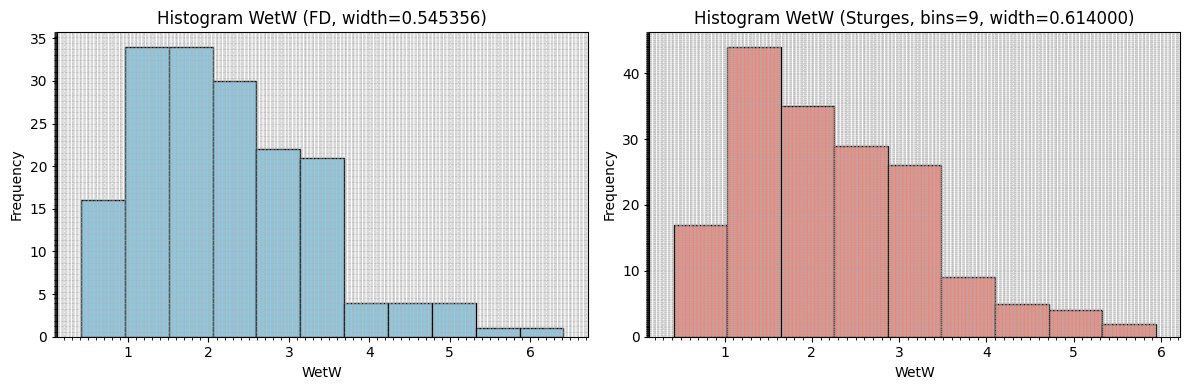


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.415000,0.960356,16
1,0.960356,1.505713,34
2,1.505713,2.051069,34
3,2.051069,2.596425,30
4,2.596425,3.141782,22
5,3.141782,3.687138,21
6,3.687138,4.232495,4
7,4.232495,4.777851,4
8,4.777851,5.323207,4
9,5.323207,5.868564,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.415,1.029,17
1,1.029,1.643,44
2,1.643,2.257,35
3,2.257,2.871,29
4,2.871,3.485,26
5,3.485,4.099,9
6,4.099,4.713,5
7,4.713,5.327,4
8,5.327,5.941,2


In [47]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def analyze_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns:
        print("Kolom 'WetW' tidak ada di dataframe.")
        return

    data = df_recovery['WetW'].dropna()
    if data.empty:
        print("Tidak ada data 'WetW' yang valid setelah drop NaN.")
        return

    # --- hitung jumlah bins ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram WetW (FD, width={width_fd_str})")
    axes[0].set_xlabel("WetW")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram WetW (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("WetW")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
wetw_data = analyze_wetw(df_recovery)

In [48]:
import numpy as np
from IPython.display import display

def filter_wetw_normal(df_recovery, lower_bound, upper_bound):
    """
    Filter data WetW berdasarkan batas bawah/atas,
    sekaligus memastikan hanya baris dengan Outlier_Status = 'Normal' yang lolos.
    Setelah selesai, kolom Outlier_Status dihapus.
    """
    # --- Filter berdasarkan WetW ---
    df_wetw = df_recovery[(df_recovery['WetW'] >= lower_bound) &
                          (df_recovery['WetW'] <= upper_bound)].copy()

    # --- Pastikan hanya baris Normal yang lolos ---
    if 'Outlier_Status' in df_wetw.columns:
        df_wetw = df_wetw[df_wetw['Outlier_Status'] == "Normal"].copy()
        # Drop kolom Outlier_Status setelah selesai
        df_wetw = df_wetw.drop(columns=['Outlier_Status'])
    else:
        print("Kolom Outlier_Status tidak ditemukan, hanya filter WetW yang diterapkan.")

    print(f"\nFiltered rows (Normal only): {len(df_wetw)}")
    display(df_wetw.head(10))

    return df_wetw

# --- Contoh pemanggilan ---
lower_bound = float(input("Masukkan batas bawah (>=): "))
upper_bound = float(input("Masukkan batas atas (<=): "))

df_wetw = filter_wetw_normal(df_recovery, lower_bound, upper_bound)

Masukkan batas bawah (>=): 0.960356
Masukkan batas atas (<=): 3.687138

Filtered rows (Normal only): 134


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
2851,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.50,3.00,0.50,1.0,2.695,6.122,2.530,HSAP,None,RSAP,SAP,1.843590,1.730718,2.695,2.434879
2897,CD500160,BINTANGOR BARAT SELATAN,BINTANGOR,2.60,3.00,0.40,1.0,1.886,7.317,1.748,HSAP,None,RSAP,SAP,1.612714,1.494711,1.886,2.005507
2927,CD500088,BINTANGOR BARAT UTARA,BINTANGOR,2.70,3.00,0.30,1.0,1.245,13.655,1.075,HSAP,None,RSAP,SAP,1.419462,1.225640,1.245,1.576135
3688,CS7210111,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.20,0.20,1.0,1.280,11.875,1.128,HSAP,None,SAP,SAP,2.189050,1.929100,1.280,1.146763
3691,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,3.00,3.25,0.25,1.0,1.560,36.218,0.995,HSAP,None,SAP,SAP,2.134324,1.361315,1.560,1.361449
3700,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.25,0.25,1.0,1.077,16.063,0.904,HSAP,None,SAP,SAP,1.473504,1.236813,1.077,1.361449
3829,CS7210111,Bintangor Blok 2 Spasi 50,BINTANGOR,3.45,4.00,0.55,1.0,2.786,17.014,2.312,HSAP,None,RSAP,SAP,1.732583,1.437808,2.786,2.649566
3922,CS6210019,Bintangor Blok 2 Spasi 25,BINTANGOR,3.60,4.00,0.40,1.0,1.829,8.803,1.668,HSAP,None,RSAP,SAP,1.563974,1.426303,1.829,2.005507
3939,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,3.65,4.10,0.45,1.0,1.207,33.306,0.805,HSAP,None,SAP,SAP,0.917425,0.611870,1.207,2.220193
3976,CS7210335,Bintangor Blok 1 Spasi 50,BINTANGOR,3.75,4.00,0.25,1.0,1.058,8.129,0.972,HSAP,None,SAP,SAP,1.447509,1.329848,1.058,1.361449


#Filter By MC


Descriptive statistics for H2O:
Count: 134
Mean: 16.356291
Standard Error: 0.709835
Median: 14.982500000000002
Mode: 4.34
Standard Deviation: 8.216936
Sample Variance: 67.518030
Kurtosis: 3.223598
Skewness: 1.434022
Range: 50.18900000000001
Minimum: 4.34
Maximum: 54.529
Sum: 2191.743
Confidence Level (95%): ±1.404026

Bin calculation:
Freedman–Diaconis -> bins=14, width=3.659890
Sturges -> bins=9, width=5.576556


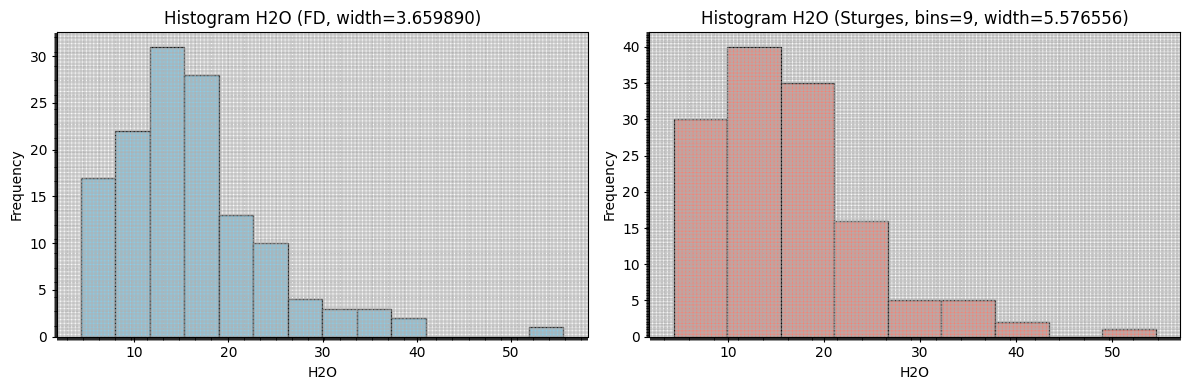


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,4.340000,7.999890,17
1,7.999890,11.659781,22
2,11.659781,15.319671,31
3,15.319671,18.979561,28
4,18.979561,22.639451,13
5,22.639451,26.299342,10
6,26.299342,29.959232,4
7,29.959232,33.619122,3
8,33.619122,37.279012,3
9,37.279012,40.938903,2



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,4.340000,9.916556,30
1,9.916556,15.493111,40
2,15.493111,21.069667,35
3,21.069667,26.646222,16
4,26.646222,32.222778,5
5,32.222778,37.799333,5
6,37.799333,43.375889,2
7,43.375889,48.952444,0
8,48.952444,54.529000,1


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="H2O"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_h2o(df_wetw):
    if 'H2O' not in df_wetw.columns:
        print("Kolom 'H2O' tidak ada di dataframe.")
        return

    data = df_wetw['H2O'].dropna()
    if data.empty:
        print("Tidak ada data 'H2O' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="H2O")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram H2O (FD, width={width_fd_str})")
    axes[0].set_xlabel("H2O")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram H2O (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("H2O")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
h2o_data = analyze_h2o(df_wetw)

In [50]:

import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_wetw berdasarkan H2O
df_h2o = df_wetw[(df_wetw['H2O'] >= lower_bound) &
                 (df_wetw['H2O'] <= upper_bound)].copy()

print(f"\nFiltered rows (H2O): {len(df_h2o)}")
display(df_h2o.head(10))

is greater than or equal to: 4.340000
is less than or equal to: 18.979561

Filtered rows (H2O): 98


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
2851,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.50,3.00,0.50,1.0,2.695,6.122,2.530,HSAP,None,RSAP,SAP,1.843590,1.730718,2.695,2.434879
2897,CD500160,BINTANGOR BARAT SELATAN,BINTANGOR,2.60,3.00,0.40,1.0,1.886,7.317,1.748,HSAP,None,RSAP,SAP,1.612714,1.494711,1.886,2.005507
2927,CD500088,BINTANGOR BARAT UTARA,BINTANGOR,2.70,3.00,0.30,1.0,1.245,13.655,1.075,HSAP,None,RSAP,SAP,1.419462,1.225640,1.245,1.576135
3688,CS7210111,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.20,0.20,1.0,1.280,11.875,1.128,HSAP,None,SAP,SAP,2.189050,1.929100,1.280,1.146763
3700,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.25,0.25,1.0,1.077,16.063,0.904,HSAP,None,SAP,SAP,1.473504,1.236813,1.077,1.361449
3829,CS7210111,Bintangor Blok 2 Spasi 50,BINTANGOR,3.45,4.00,0.55,1.0,2.786,17.014,2.312,HSAP,None,RSAP,SAP,1.732583,1.437808,2.786,2.649566
3922,CS6210019,Bintangor Blok 2 Spasi 25,BINTANGOR,3.60,4.00,0.40,1.0,1.829,8.803,1.668,HSAP,None,RSAP,SAP,1.563974,1.426303,1.829,2.005507
3976,CS7210335,Bintangor Blok 1 Spasi 50,BINTANGOR,3.75,4.00,0.25,1.0,1.058,8.129,0.972,HSAP,None,SAP,SAP,1.447509,1.329848,1.058,1.361449
4671,CS6210020,Bintangor Blok 2 Spasi 25,BINTANGOR,4.00,4.50,0.50,1.0,1.500,13.867,1.292,HSAP,None,RSAP,SAP,1.026117,0.883829,1.500,2.434879
4751,CS7210267,Bintangor Blok 1 Spasi 50,BINTANGOR,4.13,4.33,0.20,1.0,1.610,8.696,1.470,HSAP,None,RSAP,SAP,2.753414,2.513987,1.610,1.146763


# Filter By DTF


Descriptive statistics for DTF:
Count: 98
Mean: 1.467960
Standard Error: 0.033515
Median: 1.432055277
Mode: 1.401219939
Standard Deviation: 0.331783
Sample Variance: 0.110080
Kurtosis: 1.889643
Skewness: 0.993651
Range: 1.7156678309999998
Minimum: 0.883828883
Maximum: 2.599496714
Sum: 143.86008740900002
Confidence Level (95%): ±0.066518

Bin calculation:
Freedman–Diaconis -> bins=10, width=0.186336
Sturges -> bins=8, width=0.214458


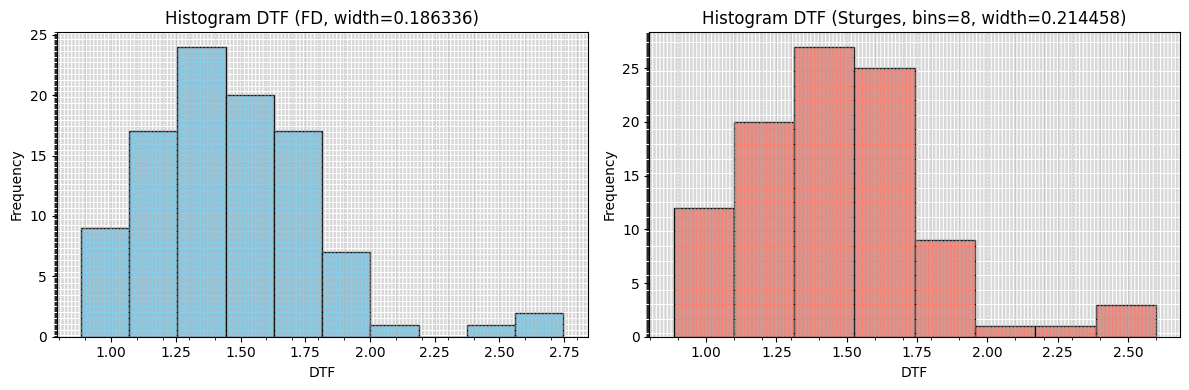


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.883829,1.070164,9
1,1.070164,1.256500,17
2,1.256500,1.442835,24
3,1.442835,1.629171,20
4,1.629171,1.815506,17
5,1.815506,2.001842,7
6,2.001842,2.188178,1
7,2.188178,2.374513,0
8,2.374513,2.560849,1
9,2.560849,2.747184,2



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.883829,1.098287,12
1,1.098287,1.312746,20
2,1.312746,1.527204,27
3,1.527204,1.741663,25
4,1.741663,1.956121,9
5,1.956121,2.170580,1
6,2.170580,2.385038,1
7,2.385038,2.599497,3


In [51]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="DTF"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_dtf(df_h2o):
    if 'DTF' not in df_h2o.columns:
        print("Kolom 'DTF' tidak ada di dataframe.")
        return

    data = df_h2o['DTF'].dropna()
    if data.empty:
        print("Tidak ada data 'DTF' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="DTF")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram DTF (FD, width={width_fd_str})")
    axes[0].set_xlabel("DTF")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram DTF (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("DTF")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
dtf_data = analyze_dtf(df_h2o)

In [52]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_h2o berdasarkan DTF
df_dtf = df_h2o[(df_h2o['DTF'] >= lower_bound) &
                (df_h2o['DTF'] <= upper_bound)].copy()

print(f"\nFiltered rows (DTF): {len(df_dtf)}")
display(df_dtf.head(400))

is greater than or equal to: 0.883829
is less than or equal to: 2.001842

Filtered rows (DTF): 93


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
2851,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.50,3.00,0.50,1.0,2.695,6.122,2.530,HSAP,None,RSAP,SAP,1.843590,1.730718,2.695,2.434879
2897,CD500160,BINTANGOR BARAT SELATAN,BINTANGOR,2.60,3.00,0.40,1.0,1.886,7.317,1.748,HSAP,None,RSAP,SAP,1.612714,1.494711,1.886,2.005507
2927,CD500088,BINTANGOR BARAT UTARA,BINTANGOR,2.70,3.00,0.30,1.0,1.245,13.655,1.075,HSAP,None,RSAP,SAP,1.419462,1.225640,1.245,1.576135
3688,CS7210111,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.20,0.20,1.0,1.280,11.875,1.128,HSAP,None,SAP,SAP,2.189050,1.929100,1.280,1.146763
3700,CS7210053,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.25,0.25,1.0,1.077,16.063,0.904,HSAP,None,SAP,SAP,1.473504,1.236813,1.077,1.361449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11266,CS6210185,Bintangor Blok 2 Spasi 25,BINTANGOR,14.75,15.15,0.40,1.0,1.438,12.378,1.260,HSAP,None,RSAP,SAP,1.229630,1.077423,1.438,2.005507
11347,CS6210047,Bintangor Blok 2 Spasi 25,BINTANGOR,15.60,16.00,0.40,1.0,2.556,14.319,2.190,HSAP,None,ESAP,SAP,2.185629,1.872664,2.556,2.005507
11352,CS7210095,Bintangor Blok 2 Spasi 50,BINTANGOR,15.70,16.10,0.40,1.0,2.191,14.377,1.876,HSAP,None,RSAP,SAP,1.873519,1.604163,2.191,2.005507
11400,CS7210075,Bintangor Blok 2 Spasi 50,BINTANGOR,16.00,16.40,0.40,1.0,2.546,8.405,2.332,HSAP,None,RSAP,SAP,2.177078,1.994088,2.546,2.005507


# SUMMARY

In [53]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(series, label):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

# --- Jalankan untuk semua kolom yang diminta ---
target_columns = ["Interval", "CoreRec", "WetW", "H2O", "DryW", "WTF", "DTF"]

for col in target_columns:
    if col in df_dtf.columns:
        descriptive_stats(df_dtf[col], label=col)
    else:
        print(f"\nKolom {col} tidak ditemukan di df_dtf.")


Descriptive statistics for Interval:
Count: 93
Mean: 0.467204
Standard Error: 0.017164
Median: 0.45
Mode: 0.4
Standard Deviation: 0.165525
Sample Variance: 0.027399
Kurtosis: -1.018786
Skewness: 0.160654
Range: 0.6000000000000001
Minimum: 0.2
Maximum: 0.8
Sum: 43.449999999999996
Confidence Level (95%): ±0.034090

Descriptive statistics for CoreRec:
Count: 93
Mean: 1.001183
Standard Error: 0.000863
Median: 1.0
Mode: 1.0
Standard Deviation: 0.008321
Sample Variance: 0.000069
Kurtosis: 53.609326
Skewness: 7.288692
Range: 0.07000000000000006
Minimum: 1.0
Maximum: 1.07
Sum: 93.11
Confidence Level (95%): ±0.001714

Descriptive statistics for WetW:
Count: 93
Mean: 2.193699
Standard Error: 0.078954
Median: 2.185
Mode: 3.33
Standard Deviation: 0.761403
Sample Variance: 0.579735
Kurtosis: -1.169695
Skewness: 0.173977
Range: 2.671
Minimum: 0.988
Maximum: 3.659
Sum: 204.01399999999998
Confidence Level (95%): ±0.156809

Descriptive statistics for H2O:
Count: 93
Mean: 12.538871
Standard Error: 0.41

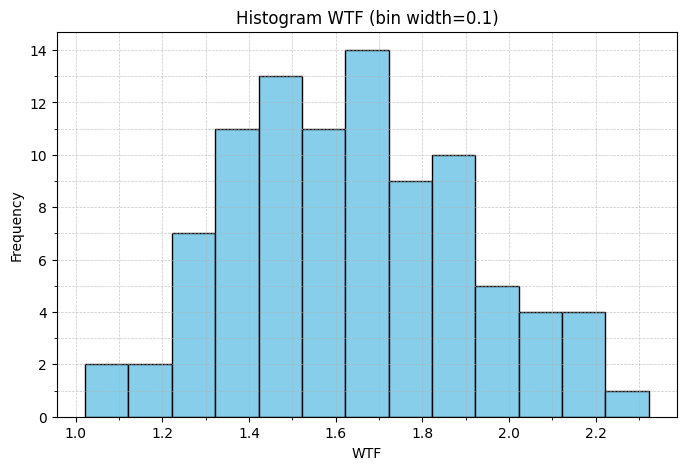


Tabel Histogram WTF:


,Bin Start,Bin End,Frequency
0,1.022013,1.122013,2
1,1.122013,1.222013,2
2,1.222013,1.322013,7
3,1.322013,1.422013,11
4,1.422013,1.522013,13
5,1.522013,1.622013,11
6,1.622013,1.722013,14
7,1.722013,1.822013,9
8,1.822013,1.922013,10
9,1.922013,2.022013,5


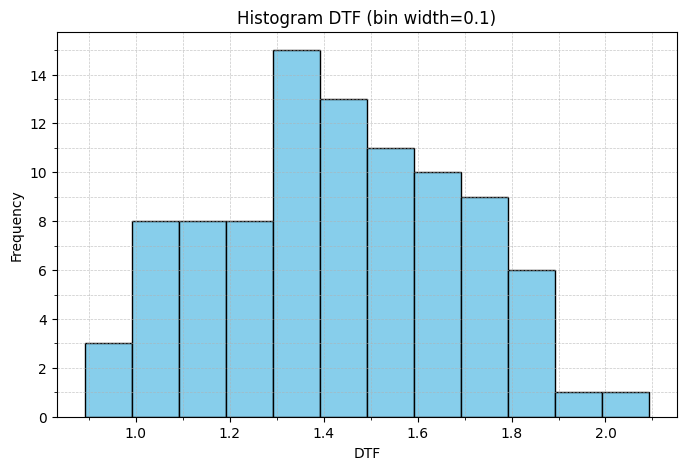


Tabel Histogram DTF:


,Bin Start,Bin End,Frequency
0,0.892038,0.992038,3
1,0.992038,1.092038,8
2,1.092038,1.192038,8
3,1.192038,1.292038,8
4,1.292038,1.392038,15
5,1.392038,1.492038,13
6,1.492038,1.592038,11
7,1.592038,1.692038,10
8,1.692038,1.792038,9
9,1.792038,1.892038,6


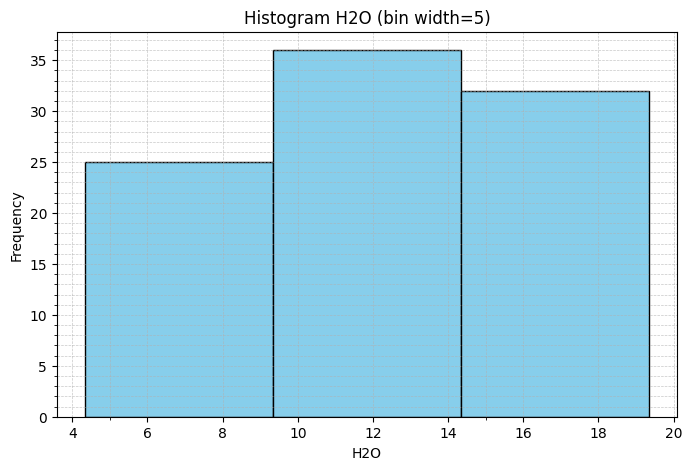


Tabel Histogram H2O:


,Bin Start,Bin End,Frequency
0,4.34,9.34,25
1,9.34,14.34,36
2,14.34,19.34,32


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

def plot_histogram_fixed_width(series, bin_width, label):
    data = series.dropna().values
    if len(data) == 0:
        print(f"Tidak ada data untuk {label}.")
        return None

    # Tentukan bins berdasarkan bin_width
    min_val, max_val = data.min(), data.max()
    bins = np.arange(min_val, max_val + bin_width, bin_width)

    # Plot histogram
    plt.figure(figsize=(8,5))
    counts, edges, _ = plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram {label} (bin width={bin_width})")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    # Minor ticks sesuai bin width
    plt.gca().xaxis.set_minor_locator(MultipleLocator(bin_width))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    # Buat tabel histogram
    table = pd.DataFrame({
        "Bin Start": edges[:-1],
        "Bin End": edges[1:],
        "Frequency": counts.astype(int)
    })

    print(f"\nTabel Histogram {label}:")
    display(table)
    return table

# --- Contoh pemanggilan ---
table_wtf = plot_histogram_fixed_width(df_dtf['WTF'], bin_width=0.1, label="WTF")
table_dtf = plot_histogram_fixed_width(df_dtf['DTF'], bin_width=0.1, label="DTF")
table_h2o = plot_histogram_fixed_width(df_dtf['H2O'], bin_width=5, label="H2O")

In [55]:
import pandas as pd

# Input nama Block, GEN_LYR, dan Material
block_name = input("Masukkan nama Block: ")
gen_lyr = input("Masukkan GEN_LYR: ")
material = input("Masukkan Material: ")

# Hitung nilai ringkasan (contoh: mean)
summary = {
    "Block": block_name,
    "GEN_LYR": gen_lyr,
    "Material": material,
    "Interval_mean": df_dtf['Interval'].dropna().mean(),
    "CoreRec_mean": df_dtf['CoreRec'].dropna().mean(),
    "WetW_mean": df_dtf['WetW'].dropna().mean(),
    "H2O_mean": df_dtf['H2O'].dropna().mean(),
    "DryW_mean": df_dtf['DryW'].dropna().mean(),
    "WTF_mean": df_dtf['WTF'].dropna().mean(),
    "DTF_mean": df_dtf['DTF'].dropna().mean()
}

# Buat nama variabel DataFrame sesuai input
var_name = f"df_{block_name.replace(' ', '_').lower()}_{gen_lyr.lower()}_{material.lower()}"
globals()[var_name] = pd.DataFrame([summary])

print(f"\nTabel Ringkasan tersimpan sebagai variabel: {var_name}")
display(globals()[var_name])

Masukkan nama Block: Bintangor
Masukkan GEN_LYR: SAP
Masukkan Material: HSAP

Tabel Ringkasan tersimpan sebagai variabel: df_bintangor_sap_hsap


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Bintangor,SAP,HSAP,0.467204,1.001183,2.193699,12.538871,1.919247,1.633512,1.431097


# Proporsional Averaging

In [ ]:
import pandas as pd

# Gabungkan semua DataFrame jadi satu
df_belambus_selatan_brk_all = pd.concat([
    df_belambus_selatan_brk_altspt,
    df_belambus_selatan_brk_althgt,
    df_belambus_selatan_brk_br,
    df_belambus_selatan_brk_dnt,
    df_belambus_selatan_brk_hgt,
    df_belambus_selatan_brk_hshgt,
    df_belambus_selatan_brk_spt
], ignore_index=True)

# Cek hasil
print(df_belambus_selatan_brk_all.shape)
display(df_belambus_selatan_brk_all.head())

(7, 10)


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,BRK,ALT SPT,1.0,1.0,5.582000,8.883250,5.087000,1.903017,1.734262
1,Belambus Selatan,BRK,ALT-HGT,1.0,1.0,4.986667,3.139333,4.830000,1.700056,1.646645
2,Belambus Selatan,BRK,BR,1.0,1.0,5.229444,3.667778,5.036667,1.782824,1.717102
3,Belambus Selatan,BRK,DNT,1.0,1.0,6.222750,2.146750,6.089000,2.128423,2.082676
4,Belambus Selatan,BRK,HGT,1.0,1.0,5.497500,3.130750,5.325500,1.877266,1.818528


In [ ]:
# Daftar material yang memang ada di hasil filter
materials_filter = df_belambus_selatan_brk_all['Material'].unique().tolist()

# Initialize df_raw with the df_block DataFrame
df_raw = df_block.copy()

# Filter raw data hanya untuk material yang relevan
df_raw_filtered = df_raw[df_raw['Material'].isin(materials_filter)]

# Hitung jumlah raw per material
raw_counts = df_raw_filtered['Material'].value_counts().reset_index()
raw_counts.columns = ['Material', 'Raw_Count']

# Hitung jumlah hasil filter per material
filtered_counts = df_belambus_selatan_brk_all['Material'].value_counts().reset_index()
filtered_counts.columns = ['Material', 'Filtered_Count']

# Gabungkan
summary = pd.merge(raw_counts, filtered_counts, on='Material', how='inner')

# Hitung persentase proporsi tiap material terhadap total raw relevan
summary['Percentage_of_Total'] = (summary['Raw_Count'] / summary['Raw_Count'].sum()) * 100

print("\nSummary per Material (hanya material relevan):")
display(summary)


Summary per Material (hanya material relevan):


,Material,Raw_Count,Filtered_Count,Percentage_of_Total
0,BR,44,1,23.783784
1,SPT,36,1,19.459459
2,HGT,35,1,18.918919
3,ALT SPT,23,1,12.432432
4,HS HGT,21,1,11.351351
5,DNT,16,1,8.648649
6,ALT-HGT,10,1,5.405405


In [ ]:
import numpy as np
import pandas as pd

# --- 1. Buat mapping material -> proporsi (dari summary yang sudah dihitung sebelumnya) ---
weights_map = summary.set_index('Material')['Percentage_of_Total'] / 100.0

# --- 2. Fungsi untuk weighted descriptive statistics ---
def weighted_means(df, weights_map):
    stats = {}
    for col in ['Interval_mean','CoreRec_mean','WetW_mean','H2O_mean','DryW_mean','WTF_mean','DTF_mean']:
        values = df[col].values
        # Ambil bobot sesuai material tiap baris
        w = df['Material'].map(weights_map).values

        # Weighted mean
        mean = np.average(values, weights=w)

        # Simpan hasil
        stats[col] = mean

    return pd.DataFrame([stats])

# --- 3. Hitung descriptive statistics proporsional ---
summary_means = weighted_means(df_belambus_selatan_brk_all, weights_map)

print("\nDescriptive Statistics Proporsional (Material, Weighted Means):")
display(summary_means)


Descriptive Statistics Proporsional (Material, Weighted Means):


,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,1.0,1.0,5.381342,4.451587,5.144737,1.836069,1.755359
